In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

D:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
png_renderer = pio.renderers["png"]
pio.renderers.default = "png"

In [3]:
data = pd.read_csv('D:/Coding Files/Coding Ninja/5. Projects/13. Market Basket Analysis Case Study/market_basket_dataset.csv')
data.head()

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      500 non-null    int64  
 1   Itemname    500 non-null    object 
 2   Quantity    500 non-null    int64  
 3   Price       500 non-null    float64
 4   CustomerID  500 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB


In [5]:
data.describe()

,BillNo,Quantity,Price,CustomerID
count,500.000000,500.000000,500.000000,500.000000
mean,1247.442000,2.978000,5.617660,54229.800000
std,144.483097,1.426038,2.572919,25672.122585
min,1000.000000,1.000000,1.040000,10504.000000
25%,1120.000000,2.000000,3.570000,32823.500000
50%,1246.500000,3.000000,5.430000,53506.500000
75%,1370.000000,4.000000,7.920000,76644.250000
max,1497.000000,5.000000,9.940000,99162.000000


### Let's look at Sales distribution of items

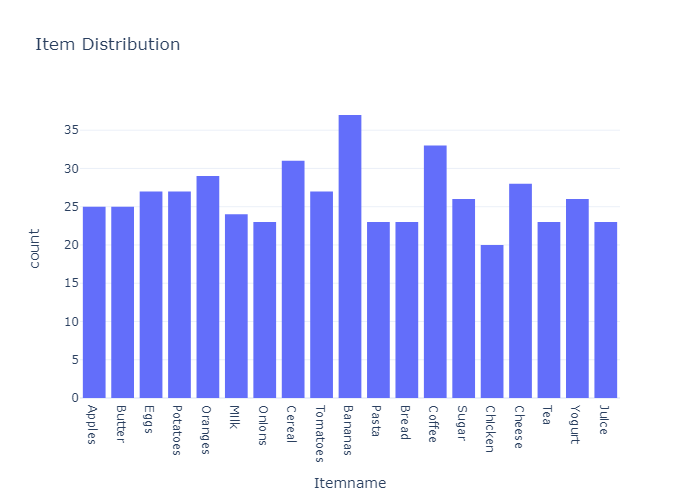

In [7]:
fig = px.histogram(data,x='Itemname',
                  title = 'Item Distribution')
fig.show()

### Let's look at top 10 most popular items sold by store

In [8]:
item_popularity = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)
item_popularity[:10]

Itemname
Bananas     119
Cheese       99
Coffee       88
Cereal       87
Milk         86
Oranges      81
Tomatoes     79
Sugar        79
Potatoes     78
Bread        76
Name: Quantity, dtype: int64

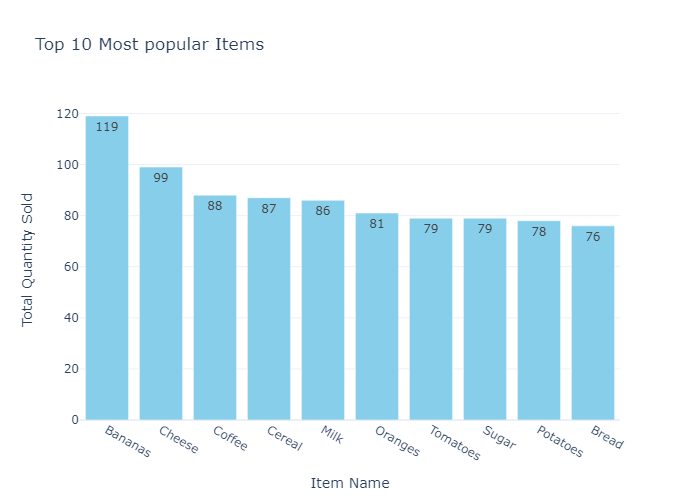

In [9]:
item_popularity = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

top_n = 10
fig = go.Figure()
fig.add_trace(go.Bar(x=item_popularity.index[:top_n], y=item_popularity.values[:top_n],
                    text=item_popularity.values[:top_n], textposition='auto',
                    marker=dict(color='skyblue')))

fig.update_layout(title=f'Top {top_n} Most popular Items',
                 xaxis_title='Item Name', yaxis_title='Total Quantity Sold')

fig.show()

So, Bananas are the most popular items sold at the store.

### Let's have a look at the customer behaviour

In [10]:
# calculate the average quantity and spending per customer
customer_behavior = data.groupby('CustomerID').agg({'Quantity':'mean','Price':'sum'}).reset_index()

# create a dataframe to display the values
table_data = pd.DataFrame({
    'CustomerID':customer_behavior['CustomerID'],
    'Average Qty':customer_behavior['Quantity'],
    'Total Spending':customer_behavior['Price']
})

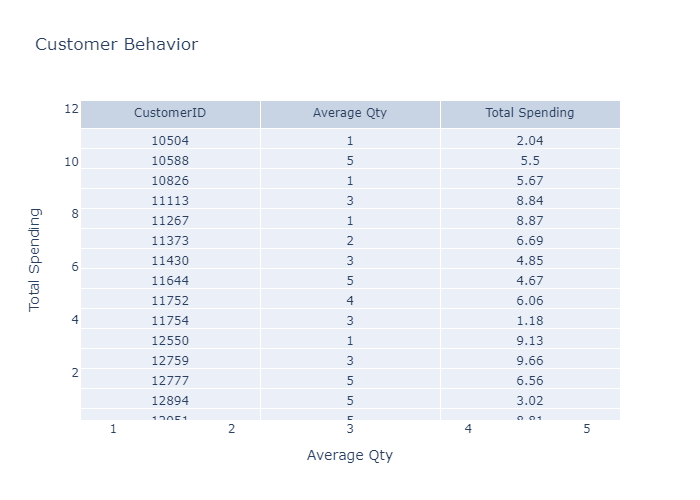

In [11]:
# create a subplot with scatter and table
fig = go.Figure()

# add scatter plot
fig.add_trace(go.Scatter(x=customer_behavior['Quantity'],y=customer_behavior['Price'],
                        mode='markers', text=customer_behavior['CustomerID'],
                        marker=dict(size=10, color='coral')))

# add a table
fig.add_trace(go.Table(
    header=dict(values=['CustomerID','Average Qty', 'Total Spending']),
    cells=dict(values=[table_data['CustomerID'], table_data['Average Qty'], table_data['Total Spending']])
))

              
# update layout
fig.update_layout(title='Customer Behavior',
                 xaxis_title='Average Qty', yaxis_title='Total Spending')
              
# show plot
fig.show()

Here, we are exploring customer behaviour, comparing average quantity and total spending, and analyzing exact numerical values in the table for each customer.

### Let's use the Apriori algorithm to create association rules

The Apriori algorithm is used to discover frequent item sets in large transactional datasets. It aims to identify items that are frequently purchased together in transactional data. It helps uncover patterns in customer behaviour, allowing businesses to make informed decisions about product placement, promotions, and marketing.

In [12]:
# !pip install mlxtend

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

basket = data.groupby('BillNo')['Itemname'].apply(list).reset_index()

basket_endcoded = basket['Itemname'].str.join('|').str.get_dummies('|')

frequent_itemsets = apriori(basket_endcoded, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)

print(rules[['antecedents','consequents','support','confidence','lift']].head(10))

D:\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



  antecedents consequents   support  confidence      lift
0     (Bread)    (Apples)  0.045752    0.304348  1.862609
1    (Apples)     (Bread)  0.045752    0.280000  1.862609
2    (Butter)    (Apples)  0.026144    0.160000  0.979200
3    (Apples)    (Butter)  0.026144    0.160000  0.979200
4    (Apples)    (Cereal)  0.019608    0.120000  0.592258
5    (Cereal)    (Apples)  0.019608    0.096774  0.592258
6    (Cheese)    (Apples)  0.039216    0.214286  1.311429
7    (Apples)    (Cheese)  0.039216    0.240000  1.311429
8   (Chicken)    (Apples)  0.032680    0.250000  1.530000
9    (Apples)   (Chicken)  0.032680    0.200000  1.530000


The above output shows association rules between different items (antecedents) and the items that tend to be purchased together with them (consequents). 

### Let’s interpret the output step by step:

- **Antecedents**: These are the items that are considered as the starting point or “if” part of the association rule. For example, Bread, Butter, Cereal, Cheese, and Chicken are the antecedents in this analysis.
- **Consequents**: These are the items that tend to be purchased along with the antecedents or the “then” part of the association rule.
- **Support**: Support measures how frequently a particular combination of items (both antecedents and consequents) appears in the dataset. It is essentially the proportion of transactions in which the items are bought together. For example, the first rule indicates that Bread and Apples are bought together in approximately 4.58% of all transactions.
- **Confidence**: Confidence quantifies the likelihood of the consequent item being purchased when the antecedent item is already in the basket. In other words, it shows the probability of buying the consequent item when the antecedent item is bought. For example, the first rule tells us that there is a 30.43% chance of buying Apples when Bread is already in the basket.
- **Lift**: Lift measures the degree of association between the antecedent and consequent items, while considering the baseline purchase probability of the consequent item. A lift value greater than 1 indicates a positive association, meaning that the items are more likely to be bought together than independently. A value less than 1 indicates a negative association. For example, the first rule has a lift of approximately 1.86, suggesting a positive association between Bread and Apples.

So, this is how you can perform Market Basket Analysis using Python.